In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Model for analyse and convert image to vector
import matplotlib.image as mpimg
from skimage.feature import hog #Chịu trách nhiệm cho việc vector hóa ảnh
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage.io import imread
import os #Làm việc với folder ảnh inputs lưu trên máy

# **Load & Read data**

In [3]:
df = pd.read_csv(r"D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10000_metadata.csv")
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [5]:
df = df.drop(columns="dx_type", axis=1)

# **Processing missing values**

In [6]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(strategy="median")
df["age"] = impute.fit_transform(df[["age"]])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   age           10015 non-null  float64
 4   sex           10015 non-null  object 
 5   localization  10015 non-null  object 
dtypes: float64(1), object(5)
memory usage: 469.6+ KB


# **Mapping Diagnosis**

**Binary Classification**

In [8]:
df["dx"].unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

In [9]:
df["bin_diagnosis"] = df["dx"].map(lambda x: 1 if x in ["mel", "bcc", "akiec", "vasc"] else 0)

# **Encoding categorical cols**

In [10]:
for col in df.columns:
    print(col, df[col].unique())

lesion_id ['HAM_0000118' 'HAM_0002730' 'HAM_0001466' ... 'HAM_0005579' 'HAM_0001576'
 'HAM_0002867']
image_id ['ISIC_0027419' 'ISIC_0025030' 'ISIC_0026769' ... 'ISIC_0033536'
 'ISIC_0032854' 'ISIC_0032258']
dx ['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']
age [80. 75. 60. 70. 55. 85. 65. 40. 50. 45. 35.  0. 30.  5. 25. 20. 10. 15.]
sex ['male' 'female' 'unknown']
localization ['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']
bin_diagnosis [0 1]


In [11]:
from sklearn.preprocessing import OneHotEncoder

cate_cols = ["sex", "localization"]


ohe = OneHotEncoder(sparse_output=False)
encoded = ohe.fit_transform(df[cate_cols])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cate_cols), index=df.index)
df = df.join(encoded_df)

df.head()

,lesion_id,image_id,dx,age,sex,localization,bin_diagnosis,sex_female,sex_male,sex_unknown,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,HAM_0000118,ISIC_0027419,bkl,80.0,male,scalp,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,HAM_0000118,ISIC_0025030,bkl,80.0,male,scalp,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,HAM_0002730,ISIC_0026769,bkl,80.0,male,scalp,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,HAM_0002730,ISIC_0025661,bkl,80.0,male,scalp,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,HAM_0001466,ISIC_0031633,bkl,75.0,male,ear,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Link the image path into dataframe**

In [12]:
base_dir = r"D:\khoane\Cybersoft\ML&DL\Capstone1\Data"

part1 = r"D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10000_images_part_1"
part2 = r"D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10000_images_part_2"

def find_image_path(image_id):
    file_name = image_id + ".jpg"
    path1 = os.path.join(part1, file_name)
    path2 = os.path.join(part2, file_name)
    
    if os.path.exists(path1):
        return path1
    elif os.path.exists(path2):
        return path2
    else:
        return None
    
df["image_path"] = df["image_id"].apply(find_image_path)

In [13]:
df.head()

,lesion_id,image_id,dx,age,sex,localization,bin_diagnosis,sex_female,sex_male,sex_unknown,...,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity,image_path
0,HAM_0000118,ISIC_0027419,bkl,80.0,male,scalp,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...
1,HAM_0000118,ISIC_0025030,bkl,80.0,male,scalp,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...
2,HAM_0002730,ISIC_0026769,bkl,80.0,male,scalp,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...
3,HAM_0002730,ISIC_0025661,bkl,80.0,male,scalp,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...
4,HAM_0001466,ISIC_0031633,bkl,75.0,male,ear,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...


In [14]:
df["image_path"].isna().sum()

0

# **Load image**

In [15]:
# Tạo hàm đọc và hiển thị ảnh
def display_images(column, number):
    number_to_visuaize = number
    rows = 1
    cols = number_to_visuaize

    fig, axes = plt.subplots(rows, cols, figsize=(15,5))

    #Duyệt qua từng hàng image_path để đọc và hiển thị ảnh
    for index, row in df.head(number_to_visuaize).iterrows():
        image_path = row[column]
        # Đọc ảnh
        image = mpimg.imread(image_path)
        ax = axes[index]
        ax.imshow(image, cmap="grey")
        ax.set_title(f"{row['bin_diagnosis']}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

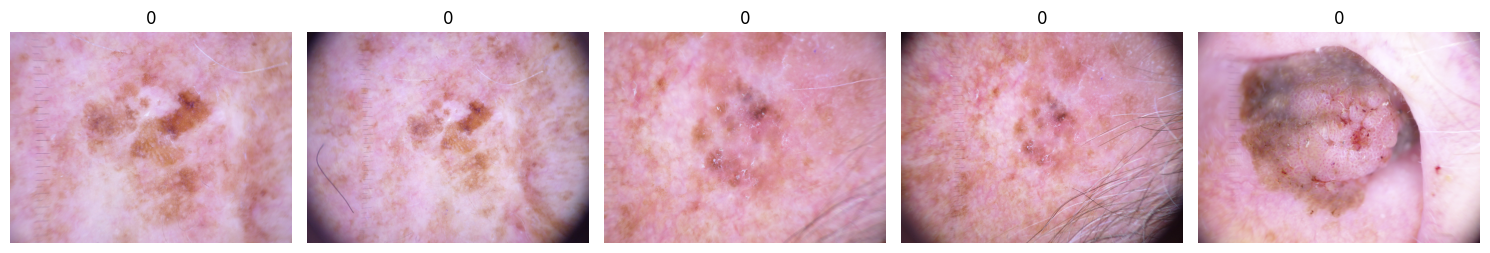

In [16]:
display_images("image_path", 5)

# **Extract image features**

In [17]:
def extract_features(image_paths, target_size=(128,128)):
    features = []

    for path in image_paths:
        try:
            # Read image
            image = imread(path)

            # Convert to grayscale
            if image.ndim == 3:
                image = rgb2gray(image)

            # Resize
            img_resized = resize(image, target_size, anti_aliasing=True)

            # HOG feature
            hog_features = hog(
                img_resized,
                pixels_per_cell=(16,16),
                cells_per_block=(2,2),
                feature_vector=True
            )

            # Add intensity stats
            mean_intensity = np.mean(img_resized)
            std_intensity = np.std(img_resized)

            # Combine features
            feature_vector = np.concatenate(
                [hog_features, [mean_intensity, std_intensity]]
            )
            features.append(feature_vector)

        except Exception as e:
            print(f"⚠ Lỗi khi xử lý ảnh {path} → {e}")
            features.append(np.zeros(50))  # fallback vector nếu lỗi
            continue

    return np.array(features)

# **Split dataset into train and test**

In [18]:
X = extract_features(df["image_path"])
y = df["bin_diagnosis"]

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

# **Data Normalization**

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
import joblib
joblib.dump(scaler, "models/scaler.pkl")

['models/scaler.pkl']

# **Training model**

In [21]:
from sklearn.svm import SVC

svm_model = SVC(kernel="rbf", random_state=42)
svm_model.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [22]:
y_pred = svm_model.predict(X_test_scaled)

# **Evaluate the model**

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1584
           1       0.78      0.03      0.06       419

    accuracy                           0.80      2003
   macro avg       0.79      0.52      0.47      2003
weighted avg       0.79      0.80      0.71      2003



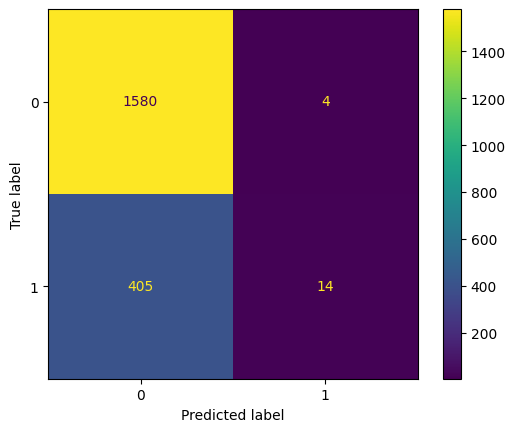

In [23]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [24]:
y.value_counts()

bin_diagnosis
0    7919
1    2096
Name: count, dtype: int64

In [25]:
y_train.value_counts()

bin_diagnosis
0    6335
1    1677
Name: count, dtype: int64

- Model dự đoán rất tốt với các trường hợp lành tính ==> Hầu như dự đoán đúng các trường hợp 0
- Tuy nhiên lại dự đoán hầu hết các trường hợp ác tính thành lành tính
- Data bị imbalance nặng giữa 2 labels ==> Sử dụng "class-weight" và SMOTE oversampling để cải thiện

# **Improve the model**

In [26]:
svm_model1 = SVC(kernel="rbf", class_weight="balanced", probability=True)

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [28]:
print(np.bincount(y_train_smote))

[6335 6335]


In [35]:
svm_model1.fit(X_train_smote, y_train_smote)
y_pred1 = svm_model1.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1584
           1       0.54      0.30      0.38       419

    accuracy                           0.80      2003
   macro avg       0.69      0.61      0.63      2003
weighted avg       0.77      0.80      0.78      2003



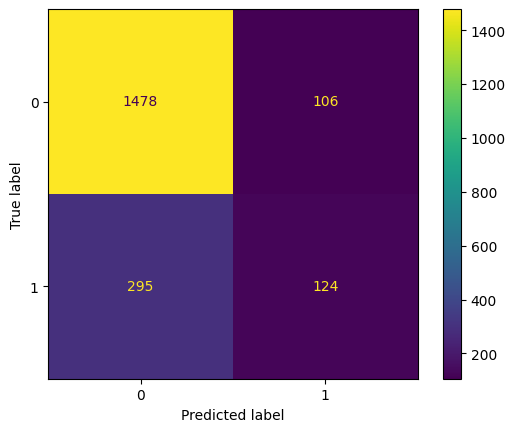

In [36]:
print(classification_report(y_test, y_pred1))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)

- So với kết quả trước đó → đã cải thiện RẤT ĐÁNG KỂ
    * Malignant TP tăng từ 14 → 124
    * Malignant FN giảm từ 405 → 295
- Class 0 (Benign):
    * Vẫn dự đoán rất tốt
- Class 1 (Malignant):
    * Recall malignant tăng rất nhiều so với ban đầu (0.03 → 0.30)
    * F1 malignant tăng nhiều: (0.06 → 0.38)


In [37]:
import joblib
joblib.dump(svm_model1, "models/bin_svm_model.pkl")

['models/bin_svm_model.pkl']

In [56]:
param_grid = {
    "C": [0.1, 1, 5],
    "gamma": ["scale", "auto", 0.01, 0.05, 0.1],
}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    SVC(kernel="rbf", class_weight="balanced"),
    param_grid,
    scoring="f1_macro",
    cv=3,
    n_jobs=-1
)
grid.fit(X_train_smote, y_train_smote)
svm_best = grid.best_estimator_

In [58]:
print("Best params:", grid.best_params_)
print("Best score (CV):", grid.best_score_)

Best params: {'C': 5, 'gamma': 'scale'}
Best score (CV): 0.9129665762406431


In [61]:
y_pred2 = svm_best.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1584
           1       0.61      0.27      0.38       419

    accuracy                           0.81      2003
   macro avg       0.72      0.61      0.63      2003
weighted avg       0.79      0.81      0.78      2003



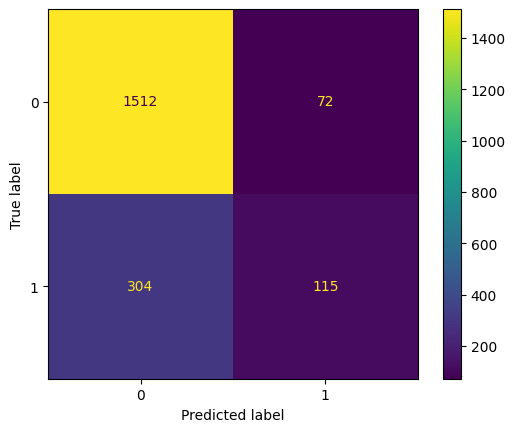

In [62]:
print(classification_report(y_test, y_pred2))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)

- Kết quả đã ổn định khi các chỉ số không thay đổi quá nhiều

# **Dùng EfficientNet B2 để cải thiện accuracy**

In [29]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, WeightedRandomSampler
from torchvision import transforms
from PIL import Image
import timm
from tqdm import tqdm

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [31]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df,
                                     test_size=0.2,
                                     random_state=42,
                                     stratify=df["bin_diagnosis"])

train_df, val_df = train_test_split(train_df,
                                    test_size=0.1,
                                    random_state=42,
                                    stratify=train_df["bin_diagnosis"])

len(train_df), len(val_df), len(test_df)

(7210, 802, 2003)

In [21]:
class SkinDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img = Image.open(row["image_path"]).convert("RGB")
        
        if self.transform:
            img = self.transform(img)
            
        label = row["bin_diagnosis"]
        return img, label


In [22]:
#Data Augmentation
train_tf = transforms.Compose([
    transforms.Resize((260, 260)),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(25),
    transforms.ToTensor(),
])

val_tf = transforms.Compose([
    transforms.Resize((260, 260)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
])


In [23]:
#Weighted sampler
#giảm imbalance mà không cần SMOTE
class_counts = train_df["bin_diagnosis"].value_counts().to_dict()
weight_per_class = {k: 1/v for k, v in class_counts.items()}

sample_weights = train_df["bin_diagnosis"].map(weight_per_class).values
sampler = WeightedRandomSampler(sample_weights, len(sample_weights), replacement=True)

train_ds = SkinDataset(train_df, train_tf)
val_ds   = SkinDataset(val_df, val_tf)
test_ds  = SkinDataset(test_df, val_tf)

train_loader = DataLoader(train_ds, batch_size=32, sampler=sampler)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

In [24]:
model = timm.create_model("efficientnet_b2", pretrained=True)

# Binary → 2 output
model.classifier = nn.Linear(model.classifier.in_features, 2)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [25]:
def train_epoch(model, loader, optimizer, criterion):
    model.train()
    running_loss, correct, total = 0, 0, 0
    
    for imgs, labels in tqdm(loader):
        imgs, labels = imgs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * imgs.size(0)
        correct += (outputs.argmax(1) == labels).sum().item()
        total += labels.size(0)
    return running_loss/total, correct/total


def valid_epoch(model, loader, criterion):
    model.eval()
    running_loss, correct, total = 0, 0, 0
    
    with torch.no_grad():
        for imgs, labels in loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item() * imgs.size(0)
            correct += (outputs.argmax(1) == labels).sum().item()
            total += labels.size(0)
    return running_loss/total, correct/total

In [26]:
best_acc = 0
EPOCHS = 15

for epoch in range(EPOCHS):
    train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion)
    val_loss, val_acc     = valid_epoch(model, val_loader, criterion)

    print(f"[{epoch+1}/{EPOCHS}] "
          f"Train Loss={train_loss:.4f} Acc={train_acc:.4f} | "
          f"Val Loss={val_loss:.4f} Acc={val_acc:.4f}")

    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), "best_efficientnet_b2.pt")
        print("✅ Saved best model!")

100%|██████████| 226/226 [16:16<00:00,  4.32s/it]


[1/15] Train Loss=0.3867 Acc=0.8147 | Val Loss=0.3332 Acc=0.8392
✅ Saved best model!


100%|██████████| 226/226 [16:16<00:00,  4.32s/it]


[2/15] Train Loss=0.2466 Acc=0.8949 | Val Loss=0.3576 Acc=0.8491
✅ Saved best model!


100%|██████████| 226/226 [16:29<00:00,  4.38s/it]


[3/15] Train Loss=0.1768 Acc=0.9358 | Val Loss=0.2715 Acc=0.8965
✅ Saved best model!


100%|██████████| 226/226 [16:20<00:00,  4.34s/it]


[4/15] Train Loss=0.1225 Acc=0.9534 | Val Loss=0.2507 Acc=0.9102
✅ Saved best model!


100%|██████████| 226/226 [16:23<00:00,  4.35s/it]


[5/15] Train Loss=0.1085 Acc=0.9588 | Val Loss=0.2892 Acc=0.9065


100%|██████████| 226/226 [16:23<00:00,  4.35s/it]


[6/15] Train Loss=0.0680 Acc=0.9759 | Val Loss=0.3183 Acc=0.9140
✅ Saved best model!


100%|██████████| 226/226 [16:19<00:00,  4.34s/it]


[7/15] Train Loss=0.0636 Acc=0.9770 | Val Loss=0.3300 Acc=0.9102


100%|██████████| 226/226 [16:14<00:00,  4.31s/it]


[8/15] Train Loss=0.0506 Acc=0.9811 | Val Loss=0.3670 Acc=0.9202
✅ Saved best model!


100%|██████████| 226/226 [16:16<00:00,  4.32s/it]


[9/15] Train Loss=0.0493 Acc=0.9813 | Val Loss=0.3355 Acc=0.9127


100%|██████████| 226/226 [16:12<00:00,  4.31s/it]


[10/15] Train Loss=0.0490 Acc=0.9828 | Val Loss=0.3049 Acc=0.9214
✅ Saved best model!


100%|██████████| 226/226 [16:13<00:00,  4.31s/it]


[11/15] Train Loss=0.0286 Acc=0.9910 | Val Loss=0.3835 Acc=0.9052


100%|██████████| 226/226 [16:13<00:00,  4.31s/it]


[12/15] Train Loss=0.0327 Acc=0.9865 | Val Loss=0.3014 Acc=0.9127


100%|██████████| 226/226 [16:15<00:00,  4.32s/it]


[13/15] Train Loss=0.0228 Acc=0.9922 | Val Loss=0.3776 Acc=0.9227
✅ Saved best model!


100%|██████████| 226/226 [16:11<00:00,  4.30s/it]


[14/15] Train Loss=0.0294 Acc=0.9896 | Val Loss=0.4151 Acc=0.9165


100%|██████████| 226/226 [16:10<00:00,  4.29s/it]


[15/15] Train Loss=0.0294 Acc=0.9889 | Val Loss=0.4677 Acc=0.9140


In [27]:
model = timm.create_model("efficientnet_b2", pretrained=False)
model.classifier = nn.Linear(model.classifier.in_features, 2)
model.load_state_dict(torch.load("best_efficientnet_b2.pt"))
model.to(device)
model.eval()

EfficientNet(
  (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNormAct2d(
    32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNormAct2d(
          32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (aa): Identity()
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2

In [30]:
from sklearn.metrics import classification_report ,roc_auc_score, f1_score
all_preds = []
all_labels = []
all_probs  = []

with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        probs = torch.softmax(outputs, dim=1)[:,1].cpu().numpy()
        preds = outputs.argmax(1).cpu().numpy()

        all_probs.extend(probs)
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

print(classification_report(all_labels, all_preds))
print("AUC:", roc_auc_score(all_labels, all_probs))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1584
           1       0.81      0.81      0.81       419

    accuracy                           0.92      2003
   macro avg       0.88      0.88      0.88      2003
weighted avg       0.92      0.92      0.92      2003

AUC: 0.9615253067669536


In [31]:
#Threshold tuning
best_t, best_f1 = 0.5, 0

for t in np.arange(0.1, 0.9, 0.01):
    temp_preds = (np.array(all_probs) >= t).astype(int)
    f1 = f1_score(all_labels, temp_preds)
    if f1 > best_f1:
        best_f1 = f1
        best_t = t

print("Best threshold:", best_t)
print("Best F1:", best_f1)


Best threshold: 0.5299999999999998
Best F1: 0.8106151990349819


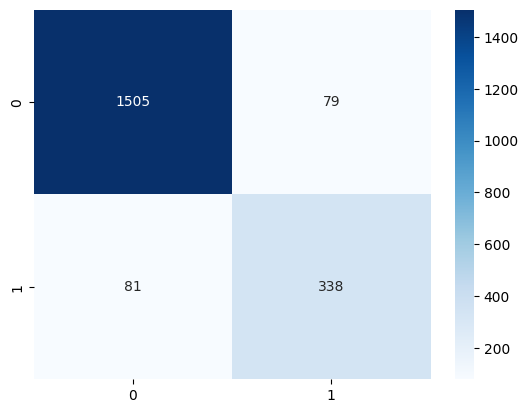

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [ ]:
#Inference
infer_tf = transforms.Compose([
    transforms.Resize((260, 260)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
])

In [43]:
def predict_image(image_path, threshold=0.5):
    # Load image
    img = Image.open(image_path).convert("RGB")
    img = infer_tf(img).unsqueeze(0).to(device)   # [1,3,224,224]

    with torch.no_grad():
        outputs = model(img)                      # raw logits
        probs = torch.softmax(outputs, dim=1)     # convert to prob
        malignant_prob = probs[:, 1].item()        # prob of class 1

    # Binary decision
    label = 1 if malignant_prob >= threshold else 0

    return {
        "prob_malignant": float(malignant_prob),
        "prediction": label
    }

In [58]:
test_img = r"D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10000_images_part_2\ISIC_0031302.jpg"

result = predict_image(test_img, threshold=best_t)

if result["prediction"] == 1:
    print(f"⚠️ Malignant probability = {result['prob_malignant']:.2f}")
else:
    print(f"✅ Benign probability = {1 - result['prob_malignant']:.2f}")

✅ Benign probability = 1.00


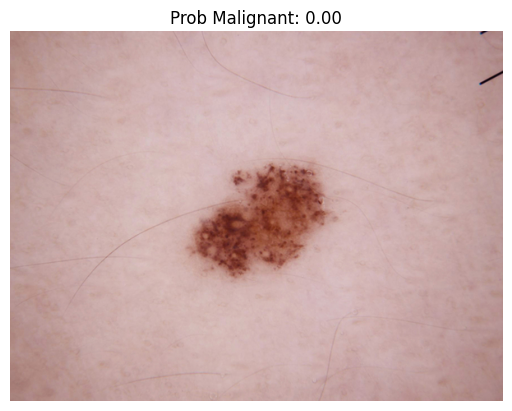

In [59]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(test_img)
plt.imshow(img)
plt.axis("off")
plt.title(f"Prob Malignant: {result['prob_malignant']:.2f}")
plt.show()

In [56]:
test_df[test_df["dx"] == "nv"]

,lesion_id,image_id,dx,age,sex,localization,bin_diagnosis,sex_female,sex_male,sex_unknown,...,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity,image_path
8522,HAM_0001846,ISIC_0031302,nv,20.0,female,upper extremity,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...
7302,HAM_0001046,ISIC_0032951,nv,40.0,male,abdomen,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...
4676,HAM_0002039,ISIC_0029663,nv,50.0,female,trunk,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...
6253,HAM_0005996,ISIC_0031338,nv,55.0,female,back,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...
4455,HAM_0004179,ISIC_0029171,nv,55.0,female,back,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4821,HAM_0001403,ISIC_0025852,nv,50.0,male,abdomen,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...
3735,HAM_0007095,ISIC_0030374,nv,60.0,male,abdomen,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...
9261,HAM_0005531,ISIC_0028477,nv,45.0,male,lower extremity,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...
8629,HAM_0000225,ISIC_0029645,nv,40.0,male,back,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...


# **Mutil-class classfication**

In [32]:
df.head()

,lesion_id,image_id,dx,age,sex,localization,bin_diagnosis,sex_female,sex_male,sex_unknown,...,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity,image_path
0,HAM_0000118,ISIC_0027419,bkl,80.0,male,scalp,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...
1,HAM_0000118,ISIC_0025030,bkl,80.0,male,scalp,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...
2,HAM_0002730,ISIC_0026769,bkl,80.0,male,scalp,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...
3,HAM_0002730,ISIC_0025661,bkl,80.0,male,scalp,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...
4,HAM_0001466,ISIC_0031633,bkl,75.0,male,ear,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...


In [33]:
multi_class_df = df[["dx", "image_path"]]
multi_class_df.head()

,dx,image_path
0,bkl,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...
1,bkl,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...
2,bkl,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...
3,bkl,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...
4,bkl,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...


In [34]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
multi_class_df["multi_diagnosis"] = label.fit_transform(multi_class_df["dx"])
print(label.classes_)

['akiec' 'bcc' 'bkl' 'df' 'mel' 'nv' 'vasc']


C:\Users\khoah\AppData\Local\Temp\ipykernel_11896\3928363212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_class_df["multi_diagnosis"] = label.fit_transform(multi_class_df["dx"])


In [41]:
multi_class_df.head()

,dx,image_path,multi_diagnosis
0,bkl,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...,2
1,bkl,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...,2
2,bkl,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...,2
3,bkl,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...,2
4,bkl,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...,2


In [35]:
multi_class_X = extract_features(multi_class_df["image_path"])
multi_class_y = multi_class_df["multi_diagnosis"]

In [36]:
multi_X_train, multi_X_test, multi_y_train, multi_y_test = train_test_split(multi_class_X,
                                                    multi_class_y,
                                                    random_state=42,
                                                    test_size=0.2,
                                                    stratify=multi_class_y)

In [37]:
scaler = StandardScaler()
multi_X_train_scaled = scaler.fit_transform(multi_X_train)
multi_X_test_scaled = scaler.transform(multi_X_test)

In [38]:
import joblib
joblib.dump(scaler, "models/multi_scaler.pkl")

['models/multi_scaler.pkl']

In [39]:
multi_svm_model = SVC(kernel="rbf",
                      random_state=42,
                      class_weight="balanced",
                      decision_function_shape="ovr")
multi_svm_model.fit(multi_X_train_scaled, multi_y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [40]:
multi_y_pred = multi_svm_model.predict(multi_X_test_scaled)

In [41]:
print(classification_report(multi_y_test, multi_y_pred, target_names=label.classes_))

              precision    recall  f1-score   support

       akiec       0.24      0.38      0.30        65
         bcc       0.20      0.29      0.24       103
         bkl       0.26      0.37      0.31       220
          df       1.00      0.04      0.08        23
         mel       0.26      0.31      0.29       223
          nv       0.84      0.73      0.78      1341
        vasc       0.00      0.00      0.00        28

    accuracy                           0.59      2003
   macro avg       0.40      0.30      0.28      2003
weighted avg       0.65      0.59      0.61      2003



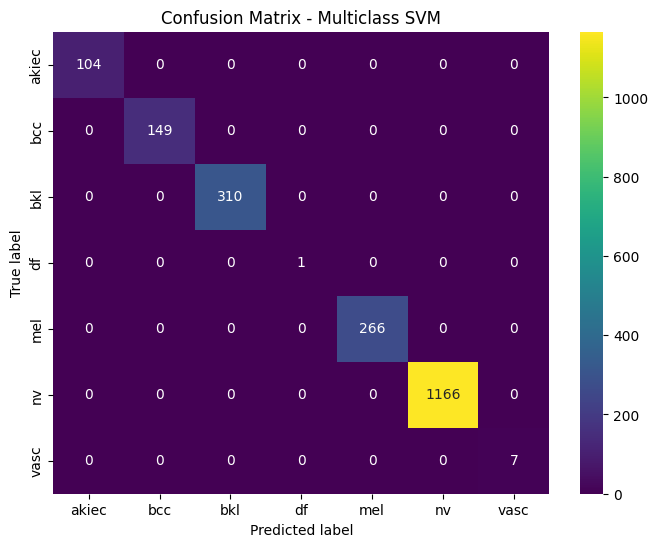

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(multi_y_pred, multi_y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis",
            xticklabels=label.classes_,
            yticklabels=label.classes_)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Multiclass SVM")
plt.show()

- Confusion Matrix cho thấy mô hình SVM có thể phân loại chính xác các lớp trội như nv, mel, bkl và bcc, trong khi các lớp hiếm như df và vasc gần như bị bỏ qua hoàn toàn.
- Mô hình này cho thấy mô hình phụ thuộc rất nhiều vào các đặc điểm lớp đa số và gặp khó khăn trong việc khái quát hóa sang các lớp thiểu số do mất cân bằng lớp và khả năng biểu đạt đặc điểm hạn chế của các mô tả HOG.
- Cấu trúc đường chéo gần như hoàn hảo với các lỗi ngoài đường chéo tối thiểu cho thấy SVM đã đưa ra những dự đoán tự tin nhưng quá thận trọng, không nắm bắt được sự tương đồng giữa các lớp giữa các loại tổn thương da.
- Điều này khẳng định rằng các đặc trưng HOG thủ công không đủ để nắm bắt các biến thể màu sắc và kết cấu tinh tế trong hình ảnh tổn thương da.
- Do đó, việc trích xuất đặc trưng dựa trên học sâu (ví dụ: ResNet hoặc EfficientNet) là cần thiết để đạt được hiệu suất cân bằng và đáng tin cậy hơn về mặt lâm sàng.

In [43]:
joblib.dump(multi_svm_model, "models/multi_svm_model.pkl")
joblib.dump(label, "models/multi_label_encoder.pkl")

['models/multi_label_encoder.pkl']

# **EfficientNet B2 for multi-class classification**

In [44]:
num_classes = len(label.classes_)
label.classes_, num_classes

(array(['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], dtype=object), 7)

In [45]:
multi_class_df.head()

,dx,image_path,multi_diagnosis
0,bkl,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...,2
1,bkl,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...,2
2,bkl,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...,2
3,bkl,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...,2
4,bkl,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...,2


In [46]:
multi_train_df, multi_test_df = train_test_split(multi_class_df,
                                     test_size=0.2,
                                     random_state=42,
                                     stratify=multi_class_df["multi_diagnosis"])

multi_train_df, multi_val_df = train_test_split(multi_train_df,
                                    test_size=0.1,
                                    random_state=42,
                                    stratify=multi_train_df["multi_diagnosis"])

len(multi_train_df), len(multi_val_df), len(multi_test_df)

(7210, 802, 2003)

In [47]:
IMG_SIZE = 260

#Data Augmentation
multi_train_tf = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.AutoAugment(transforms.AutoAugmentPolicy.IMAGENET),  # mạnh, nhưng hiệu quả
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
])

multi_val_tf = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
])

In [48]:
class MultiSkinDataset(Dataset):
    def __init__(self, df, tfms):
        self.paths = df["image_path"].tolist()
        self.labels = df["multi_diagnosis"].tolist()
        self.tfms = tfms
    def __len__(self):
        return len(self.paths)
    def __getitem__(self, idx):
        img = Image.open(self.paths[idx]).convert("RGB")
        img = self.tfms(img)
        label = self.labels[idx]
        return img, label

In [49]:
class_counts = multi_train_df["multi_diagnosis"].value_counts().sort_index().values
class_weights = 1.0 / (class_counts / class_counts.sum())
class_weights = class_weights / class_weights.sum() * num_classes
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)

# Sampler để oversample lớp hiếm
sample_weights = multi_train_df["multi_diagnosis"].map(lambda y: class_weights[y]).values
sampler = WeightedRandomSampler(
    weights=sample_weights,
    num_samples=len(sample_weights),
    replacement=True
)

In [50]:
multi_train_ds = MultiSkinDataset(multi_train_df, multi_train_tf)
multi_val_ds   = MultiSkinDataset(multi_val_df,   multi_val_tf)
multi_test_ds  = MultiSkinDataset(multi_test_df,  multi_val_tf)

BATCH_SIZE = 16

multi_train_loader = DataLoader(
    multi_train_ds,
    batch_size=BATCH_SIZE,
    sampler=sampler,
    num_workers=0,
    pin_memory=True
)

multi_val_loader = DataLoader(
    multi_val_ds,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0,
    pin_memory=True
)

multi_test_loader = DataLoader(
    multi_test_ds,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0,
    pin_memory=True
)

In [51]:
from torchvision import models 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

base = models.efficientnet_b2(
    weights=models.EfficientNet_B2_Weights.IMAGENET1K_V1
)

# fine-tune full model
for p in base.features.parameters():
    p.requires_grad = True

in_feats = base.classifier[1].in_features   # 1408

base.classifier = nn.Sequential(
    nn.Dropout(p=0.3),
    nn.Linear(in_feats, num_classes)
)

model = base.to(device)

In [52]:
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import os, math, time, copy, random

EPOCHS = 15
lr = 3e-4

criterion = nn.CrossEntropyLoss(weight=class_weights_tensor.to(device))
optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)

scaler = torch.cuda.amp.GradScaler(enabled=torch.cuda.is_available())

best_wts = copy.deepcopy(model.state_dict())
best_val_f1 = -1
patience, bad_epochs = 4, 0

In [53]:
def epoch_run(model, loader, train=True):
    model.train(train)
    loss_meter, all_preds, all_labels = 0.0, [], []
    for imgs, labels in tqdm(loader, disable=False):
        imgs, labels = imgs.to(device), labels.to(device)

        with torch.cuda.amp.autocast(enabled=torch.cuda.is_available()):
            logits = model(imgs)
            loss = criterion(logits, labels)

        if train:
            optimizer.zero_grad(set_to_none=True)
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

        loss_meter += loss.item()*imgs.size(0)
        preds = logits.argmax(1)
        all_preds.append(preds.detach().cpu().numpy())
        all_labels.append(labels.detach().cpu().numpy())

    loss_avg = loss_meter / len(loader.dataset)
    y_true = np.concatenate(all_labels)
    y_pred = np.concatenate(all_preds)

    # Macro F1
    from sklearn.metrics import f1_score, accuracy_score
    f1_macro = f1_score(y_true, y_pred, average="macro", zero_division=0)
    acc = accuracy_score(y_true, y_pred)
    return loss_avg, f1_macro, acc, y_true, y_pred


In [54]:
EPOCHS_STAGE1 = 3     # train classifier vài epoch
EPOCHS_STAGE2 = 20    # fine-tune full network
CLASS_ORDER = list(label.classes_)

# ====== Stage 1: Freeze backbone ======
for p in model.features.parameters():
    p.requires_grad = False

optimizer = torch.optim.AdamW(
    model.classifier.parameters(),
    lr=3e-4,            # LR lớn hơn cho classifier
    weight_decay=1e-4
)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer, T_max=EPOCHS_STAGE1
)

best_val_f1 = 0
bad_epochs = 0
best_wts = None

for epoch in range(1, EPOCHS_STAGE1+1):
    print(f"\n(Stage-1) Epoch {epoch}/{EPOCHS_STAGE1} | lr={optimizer.param_groups[0]['lr']:.2e}")

    tr_loss, tr_f1, tr_acc, _, _ = epoch_run(model, multi_train_loader, train=True)
    with torch.no_grad():
        va_loss, va_f1, va_acc, yv, pv = epoch_run(model, multi_val_loader, train=False)

    scheduler.step()

    print(f"Train  | loss {tr_loss:.4f} | acc {tr_acc:.3f} | macroF1 {tr_f1:.3f}")
    print(f"Val    | loss {va_loss:.4f} | acc {va_acc:.3f} | macroF1 {va_f1:.3f}")

    if va_f1 > best_val_f1:
        best_val_f1 = va_f1
        best_wts = copy.deepcopy(model.state_dict())
        torch.save({"state_dict": best_wts, "classes": CLASS_ORDER}, 
                   "effb2_multi_best_stage1.pth")
        print("✅ Saved stage-1 best model")
        bad_epochs = 0
    else:
        bad_epochs += 1



(Stage-1) Epoch 1/3 | lr=3.00e-04


100%|██████████| 51/51 [00:39<00:00,  1.29it/s]


Train  | loss 1.3277 | acc 0.255 | macroF1 0.156
Val    | loss 1.9413 | acc 0.065 | macroF1 0.101
✅ Saved stage-1 best model

(Stage-1) Epoch 2/3 | lr=2.25e-04


100%|██████████| 51/51 [00:34<00:00,  1.46it/s]


Train  | loss 1.0996 | acc 0.325 | macroF1 0.228
Val    | loss 1.7979 | acc 0.082 | macroF1 0.130
✅ Saved stage-1 best model

(Stage-1) Epoch 3/3 | lr=7.50e-05


100%|██████████| 51/51 [00:34<00:00,  1.47it/s]

Train  | loss 1.0458 | acc 0.348 | macroF1 0.260
Val    | loss 1.8069 | acc 0.080 | macroF1 0.120


In [55]:
# ====== Stage 2: Unfreeze backbone ======
for p in model.features.parameters():
    p.requires_grad = True

optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=1e-4,                # LR nhỏ để fine-tune backbone
    weight_decay=1e-4
)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer, T_max=EPOCHS_STAGE2
)

best_val_f1 = 0
bad_epochs = 0

for epoch in range(1, EPOCHS_STAGE2+1):
    print(f"\n(Stage-2) Epoch {epoch}/{EPOCHS_STAGE2} | lr={optimizer.param_groups[0]['lr']:.2e}")

    tr_loss, tr_f1, tr_acc, _, _ = epoch_run(model, multi_train_loader, train=True)
    with torch.no_grad():
        va_loss, va_f1, va_acc, yv, pv = epoch_run(model, multi_val_loader, train=False)

    scheduler.step()

    print(f"Train  | loss {tr_loss:.4f} | acc {tr_acc:.3f} | macroF1 {tr_f1:.3f}")
    print(f"Val    | loss {va_loss:.4f} | acc {va_acc:.3f} | macroF1 {va_f1:.3f}")

    if va_f1 > best_val_f1:
        best_val_f1 = va_f1
        best_wts = copy.deepcopy(model.state_dict())
        torch.save({"state_dict": best_wts, "classes": CLASS_ORDER}, 
                   "effb2_multi_best_stage2.pth")
        print("✅ Saved stage-2 best model")
        bad_epochs = 0
    else:
        bad_epochs += 1
        if bad_epochs >= patience:
            print("⛔ Early stopping triggered")
            break

# Load best model
model.load_state_dict(best_wts)



(Stage-2) Epoch 1/20 | lr=1.00e-04


100%|██████████| 51/51 [00:35<00:00,  1.46it/s]


Train  | loss 0.6291 | acc 0.508 | macroF1 0.442
Val    | loss 1.0518 | acc 0.273 | macroF1 0.331
✅ Saved stage-2 best model

(Stage-2) Epoch 2/20 | lr=9.94e-05


100%|██████████| 51/51 [00:34<00:00,  1.46it/s]


Train  | loss 0.3977 | acc 0.621 | macroF1 0.567
Val    | loss 0.9055 | acc 0.406 | macroF1 0.407
✅ Saved stage-2 best model

(Stage-2) Epoch 3/20 | lr=9.76e-05


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Train  | loss 0.3284 | acc 0.669 | macroF1 0.634
Val    | loss 0.8661 | acc 0.502 | macroF1 0.444
✅ Saved stage-2 best model

(Stage-2) Epoch 4/20 | lr=9.46e-05


100%|██████████| 51/51 [00:34<00:00,  1.47it/s]


Train  | loss 0.2423 | acc 0.718 | macroF1 0.686
Val    | loss 0.7442 | acc 0.575 | macroF1 0.521
✅ Saved stage-2 best model

(Stage-2) Epoch 5/20 | lr=9.05e-05


100%|██████████| 51/51 [00:33<00:00,  1.53it/s]


Train  | loss 0.2104 | acc 0.742 | macroF1 0.721
Val    | loss 0.6961 | acc 0.576 | macroF1 0.576
✅ Saved stage-2 best model

(Stage-2) Epoch 6/20 | lr=8.54e-05


100%|██████████| 51/51 [00:33<00:00,  1.51it/s]


Train  | loss 0.1830 | acc 0.766 | macroF1 0.743
Val    | loss 0.6654 | acc 0.607 | macroF1 0.595
✅ Saved stage-2 best model

(Stage-2) Epoch 7/20 | lr=7.94e-05


100%|██████████| 51/51 [00:33<00:00,  1.51it/s]


Train  | loss 0.1745 | acc 0.775 | macroF1 0.759
Val    | loss 0.6914 | acc 0.557 | macroF1 0.567

(Stage-2) Epoch 8/20 | lr=7.27e-05


100%|██████████| 51/51 [00:34<00:00,  1.48it/s]


Train  | loss 0.1500 | acc 0.787 | macroF1 0.766
Val    | loss 0.5706 | acc 0.661 | macroF1 0.645
✅ Saved stage-2 best model

(Stage-2) Epoch 9/20 | lr=6.55e-05


100%|██████████| 51/51 [00:34<00:00,  1.48it/s]


Train  | loss 0.1329 | acc 0.812 | macroF1 0.792
Val    | loss 0.6319 | acc 0.595 | macroF1 0.613

(Stage-2) Epoch 10/20 | lr=5.78e-05


100%|██████████| 51/51 [00:36<00:00,  1.42it/s]


Train  | loss 0.1237 | acc 0.812 | macroF1 0.798
Val    | loss 0.5607 | acc 0.665 | macroF1 0.671
✅ Saved stage-2 best model

(Stage-2) Epoch 11/20 | lr=5.00e-05


100%|██████████| 51/51 [00:34<00:00,  1.48it/s]


Train  | loss 0.1183 | acc 0.829 | macroF1 0.819
Val    | loss 0.5713 | acc 0.642 | macroF1 0.665

(Stage-2) Epoch 12/20 | lr=4.22e-05


100%|██████████| 51/51 [00:34<00:00,  1.47it/s]


Train  | loss 0.1144 | acc 0.827 | macroF1 0.812
Val    | loss 0.5794 | acc 0.647 | macroF1 0.657

(Stage-2) Epoch 13/20 | lr=3.45e-05


100%|██████████| 51/51 [00:34<00:00,  1.47it/s]


Train  | loss 0.1016 | acc 0.845 | macroF1 0.835
Val    | loss 0.5381 | acc 0.676 | macroF1 0.706
✅ Saved stage-2 best model

(Stage-2) Epoch 14/20 | lr=2.73e-05


100%|██████████| 51/51 [00:34<00:00,  1.46it/s]


Train  | loss 0.0893 | acc 0.852 | macroF1 0.839
Val    | loss 0.5246 | acc 0.670 | macroF1 0.709
✅ Saved stage-2 best model

(Stage-2) Epoch 15/20 | lr=2.06e-05


100%|██████████| 51/51 [00:34<00:00,  1.46it/s]


Train  | loss 0.0834 | acc 0.859 | macroF1 0.851
Val    | loss 0.5432 | acc 0.678 | macroF1 0.709

(Stage-2) Epoch 16/20 | lr=1.46e-05


100%|██████████| 51/51 [00:34<00:00,  1.47it/s]


Train  | loss 0.0819 | acc 0.860 | macroF1 0.852
Val    | loss 0.5691 | acc 0.661 | macroF1 0.673

(Stage-2) Epoch 17/20 | lr=9.55e-06


100%|██████████| 51/51 [00:35<00:00,  1.45it/s]


Train  | loss 0.0740 | acc 0.870 | macroF1 0.860
Val    | loss 0.5729 | acc 0.673 | macroF1 0.687

(Stage-2) Epoch 18/20 | lr=5.45e-06


100%|██████████| 51/51 [00:34<00:00,  1.48it/s]

Train  | loss 0.0772 | acc 0.866 | macroF1 0.858
Val    | loss 0.5386 | acc 0.687 | macroF1 0.696
⛔ Early stopping triggered


<All keys matched successfully>

In [56]:
from sklearn.metrics import f1_score, accuracy_score
import numpy as np
from tqdm import tqdm

def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss, preds_all, labels_all = 0.0, [], []
    for imgs, labels in tqdm(loader, desc="Training", leave=False):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * imgs.size(0)
        preds_all.append(outputs.argmax(1).cpu().numpy())
        labels_all.append(labels.cpu().numpy())
    y_pred = np.concatenate(preds_all)
    y_true = np.concatenate(labels_all)
    return running_loss / len(loader.dataset), accuracy_score(y_true, y_pred), f1_score(y_true, y_pred, average="macro")

def evaluate(model, loader, criterion, device):
    model.eval()
    running_loss, preds_all, labels_all = 0.0, [], []
    with torch.no_grad():
        for imgs, labels in tqdm(loader, desc="Evaluating", leave=False):
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * imgs.size(0)
            preds_all.append(outputs.argmax(1).cpu().numpy())
            labels_all.append(labels.cpu().numpy())
    y_pred = np.concatenate(preds_all)
    y_true = np.concatenate(labels_all)
    return running_loss / len(loader.dataset), accuracy_score(y_true, y_pred), f1_score(y_true, y_pred, average="macro"), y_true, y_pred


In [59]:
ckpt = torch.load("effb2_multi_best_stage2.pth", map_location=device)

model.load_state_dict(ckpt["state_dict"])
CLASS_ORDER = ckpt["classes"]

model.to(device)
model.eval()

test_loss, test_acc, test_f1, y_true, y_pred = evaluate(model, multi_test_loader, criterion, device)
print(f"\nTest Accuracy: {test_acc:.3f}, Macro F1: {test_f1:.3f}")


Test Accuracy: 0.648, Macro F1: 0.680


              precision    recall  f1-score   support

       akiec     0.6024    0.7692    0.6757        65
         bcc     0.6866    0.8932    0.7764       103
         bkl     0.5119    0.7818    0.6187       220
          df     0.7097    0.9565    0.8148        23
         mel     0.2992    0.8251    0.4391       223
          nv     0.9882    0.5600    0.7149      1341
        vasc     0.5909    0.9286    0.7222        28

    accuracy                         0.6475      2003
   macro avg     0.6270    0.8164    0.6803      2003
weighted avg     0.8224    0.6475    0.6768      2003



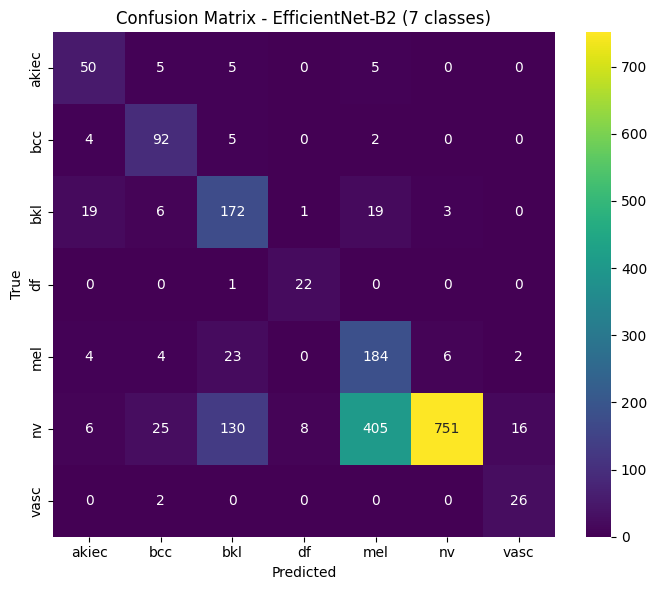

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_true, y_pred, target_names=label.classes_, digits=4))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis",
            xticklabels=label.classes_,
            yticklabels=label.classes_)
plt.title("Confusion Matrix - EfficientNet-B2 (7 classes)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

- bcc, df, vasc — F1 cao
- akiec, bkl — khá ổn
- nv — F1 cao (0.71) dù recall thấp
NV bị nhầm → BKL khá nhiều

- MEL bị nhầm → NV
- DF được detect cực tốt (F1~0.81)
- VASC detect cực tốt (recall 0.93)

In [62]:
def multi_predict_image(path, topk=3):
    model.eval()

    img = Image.open(path).convert("RGB")
    img = multi_val_tf(img).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(img)
        probs = torch.softmax(outputs, dim=1)[0]

    # Full result
    cls_idx = torch.argmax(probs).item()
    cls_name = label.classes_[cls_idx]
    confidence = probs[cls_idx].item()

    # top-k
    topk_vals, topk_idxs = torch.topk(probs, topk)
    topk = [(label.classes_[i], topk_vals[j].item()) for j, i in enumerate(topk_idxs)]

    return {
        "pred_class": cls_name,
        "confidence": confidence,
        "topk": topk
    }


In [63]:
sample_path = multi_test_df.iloc[0]["image_path"]
result = multi_predict_image(sample_path)
print(result)

{'pred_class': 'mel', 'confidence': 0.626225471496582, 'topk': [('mel', 0.626225471496582), ('nv', 0.15126670897006989), ('akiec', 0.11718917638063431)]}
